In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

Let's start by building the Jaynes-Cummings model, as it's really similar to our system and a lot of the same tools apply (but it's included in the walkthrough!).

In [2]:
N = 10
omega_a = 1.0
omega_c = 1.25
g = 0.05
a = tensor(identity(2), destroy(N))
sm = tensor(destroy(2), identity(N))
sz = tensor(sigmaz(), identity(N))
H = 0.5 * omega_a * sz + omega_c * a.dag() * a + g * (a.dag() * sm + a * sm.dag())

Seems fairly simple. Of course, our Hamiltonian is time dependent. But that comes later...
For now, it's worth noting how the results of simulations are stored:

In [ ]:
expt0 = result.expect[0]
times = result.times
plot(times, expt0)
qsave(result, 'cavity+qubit-data')
stored_result = qload('cavity+qubit-data')

Don't run that cell - but those seem like the key tools for working with resulting data.

Here's how you would simulate unitary evolution of a state psi0 under a Hamiltonain H, and get the sigmaz expectation values:

In [ ]:
result = sesolve(H, psi0, times, [sigmaz()])

But we aren't doing coherent unitary Schroedinger evolution, we are doing master equation stuff with density matrices. Here's a density matrix example, with a two level atom coupled to a leaky cavity. The leakiness is described by the fourth item in the mesolve(). The expectation values to evaluate are given in the fifth item.

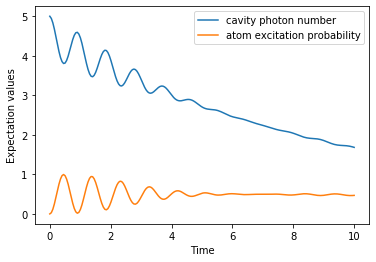

In [12]:
times = np.linspace(0.0, 10.0, 200)
psi0 = tensor(fock(2,0), fock(10, 5))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))
H = 2 * np.pi * a.dag() * a + 2 * np.pi * sm.dag() * sm + 2 * np.pi * 0.25 * (sm * a.dag() + sm.dag() * a)
result = mesolve(H, psi0, times, [np.sqrt(0.1)*a], [a.dag()*a, sm.dag()*sm])
plt.figure()
plt.plot(times, result.expect[0])
plt.plot(times, result.expect[1])
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend(("cavity photon number", "atom excitation probability"))
plt.show()

Very cool! This is exactly solving the master equation using Lindblats master equation. There's also a Monte Carlo simulator which allows you to simulate individual instances of the experiment, and presumably get some statistics. It's an extra thing to deal with. Is it worth it? I'm not sure at the moment. Might be a question for Kanu.

What's next? Let's try making Figure 2c:

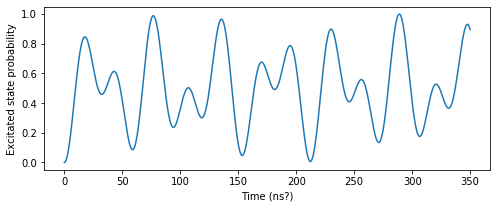

In [24]:
times = np.linspace(0.0, 350, 1000)
psi0 = tensor(fock(2,0), np.sqrt(2)*(fock(10, 3) + fock(10, 1)))
a  = tensor(qeye(2), destroy(10))
sm = tensor(destroy(2), qeye(10))
# hbar = 6.62607015e-34
# omega = 2 * np.pi * 19e6 * hbar
omega = 2 * np.pi * 19e-3
H = 0.5 * omega * sm.dag() * a + 0.5 * omega * sm * a.dag()
result = mesolve(H, psi0, times, [], [sm.dag()*sm])
plt.figure(figsize=(8,3))
plt.plot(times, result.expect[0])
plt.xlabel('Time (ns?)')
plt.ylabel('Excitated state probability')
plt.show()